## Analysis and EDA

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [39]:
# Read the data
df = pd.read_csv('/content/Credit_Default_Prediction_Data_Updated.csv')
df.head()

,LoanID,Customer Type,Loan Type,Loan Amount (USD),Customer Monthly Turn Over (USD),Loan Term (Months),Outstanding Balance,Collateral Types,Collateral Value (USD),County,Drought Probability,Flood Probability,Landslide Probability,Days Past Due Date,Credit Default
0,SYN00000,SME,Agricultural Loan,364511.10,905444.68,36,51240.06,Vehicle,525416.18,Turkana,0.982142,0.093029,0.010000,0,0
1,SYN00001,Corporate,Agricultural Loan,201769.46,101991.26,72,76020.05,Vehicle,346304.95,Garissa,0.875982,0.523716,0.066324,0,1
2,SYN00002,Corporate,Manufacturing,4652.85,5965.12,Revolving,414.16,Building,11996.05,Garissa,0.924866,0.516732,0.069289,0,0
3,SYN00003,Individual,Agricultural Loan,40213.46,97206.48,72,34001.31,Building,108161.83,Kwale,0.210189,0.550838,0.259047,0,0
4,SYN00004,SME,Business Loan,11040.57,31875.85,240,5453.20,Building,21925.70,Turkana,0.984698,0.010000,0.010000,14,0


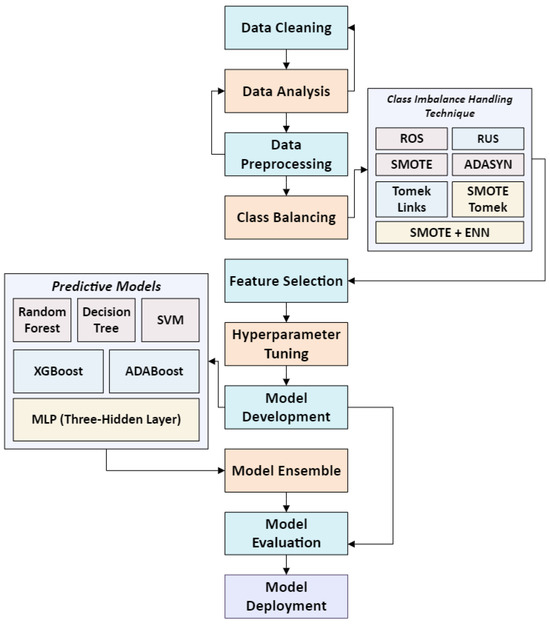

In [5]:
# df.info()
# df.isna().sum()

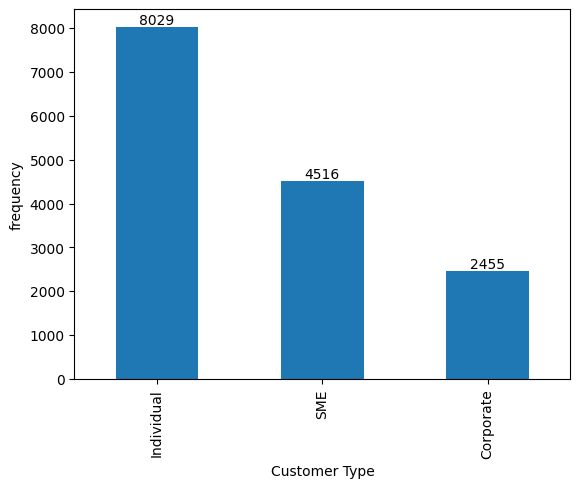

In [6]:
# Who are my customers?
ax=df['Customer Type'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xlabel('Customer Type')
plt.ylabel('frequency')
plt.show()

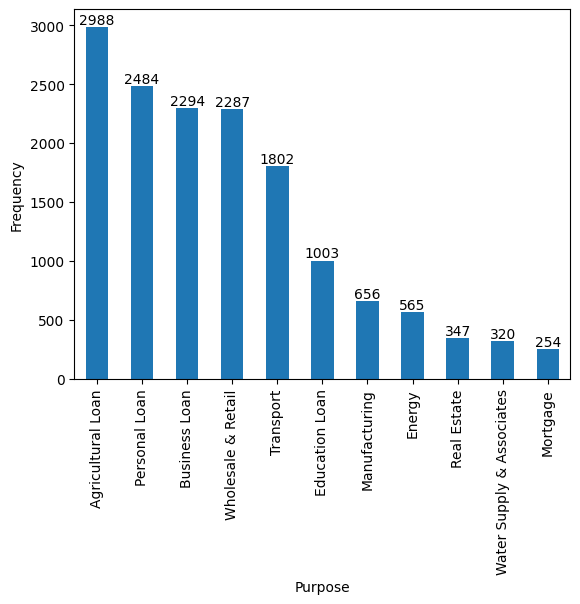

In [7]:
# How is the distribution of my loanbook? # Why are they borrowing? purpose
ax=df['Loan Type'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Create a cross table of the loan intent and loan status
pd.crosstab(df['Loan Type'], df['Credit Default'], margins=True, normalize='index').style.format("{:.0%}")

Credit Default,0,1
Loan Type,,
Agricultural Loan,66%,34%
Business Loan,67%,33%
Education Loan,67%,33%
Energy,68%,32%
Manufacturing,67%,33%
Mortgage,68%,32%
Personal Loan,67%,33%
Real Estate,66%,34%
Transport,67%,33%


In [9]:
# Let's compare Outstanding balance & Collateral Value per segment
df_summary = df.groupby('Customer Type')[['Outstanding Balance', 'Collateral Value (USD)']].sum().reset_index()
df_summary.style.format({
    'Outstanding Balance': '{:,.0f}',
    'Collateral Value (USD)': '{:,.0f}'
})

,Customer Type,Outstanding Balance,Collateral Value (USD)
0,Corporate,"307,792,620","1,260,724,117"
1,Individual,"1,005,150,370","4,187,161,182"
2,SME,"563,716,057","2,336,819,163"


/tmp/ipython-input-10-2653381787.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Loan Type', y='Outstanding Balance', data=df, ci=None)


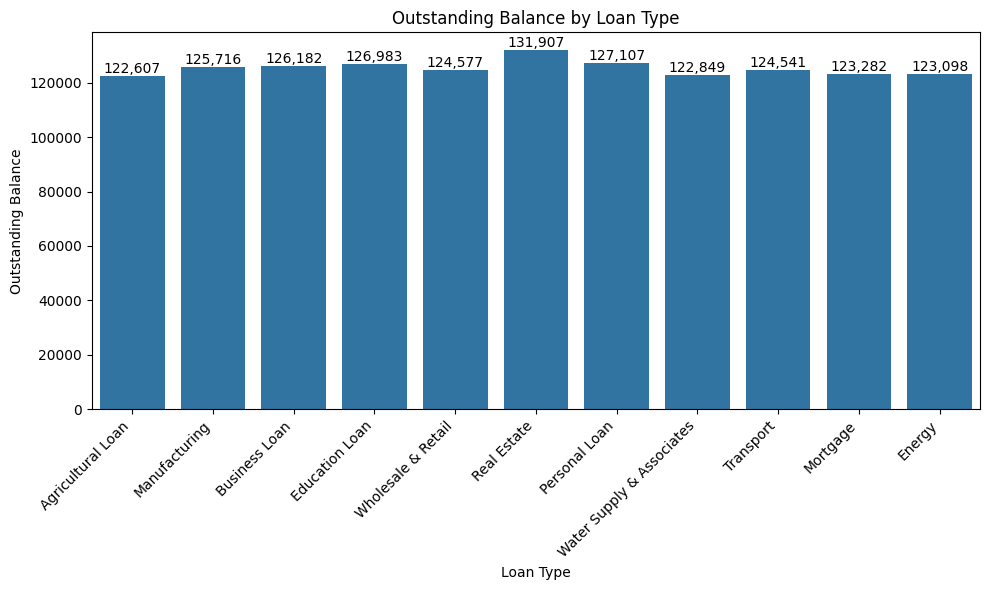

In [10]:
# How much does each Loan Type and outstanding balances

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loan Type', y='Outstanding Balance', data=df, ci=None)
plt.xlabel('Loan Type')
plt.ylabel('Outstanding Balance')
plt.title('Outstanding Balance by Loan Type')

# Add outstanding balance values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

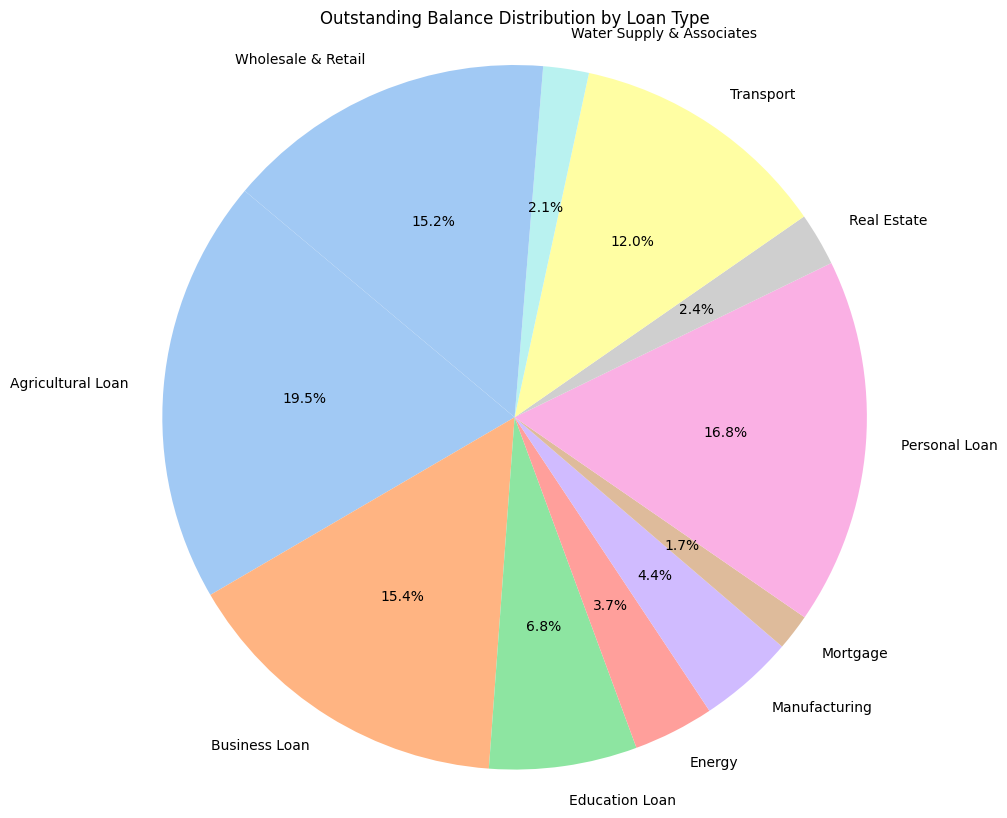

In [11]:
# Calculate total outstanding balance per loan type
loan_balance = df.groupby('Loan Type')['Outstanding Balance'].sum()

plt.figure(figsize=(10, 10))
plt.pie(loan_balance, labels=loan_balance.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Outstanding Balance Distribution by Loan Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


From the above we discover that

People taking Personal, Business, Education, and Mortgage Loans for puroposes seem to default more frequently.

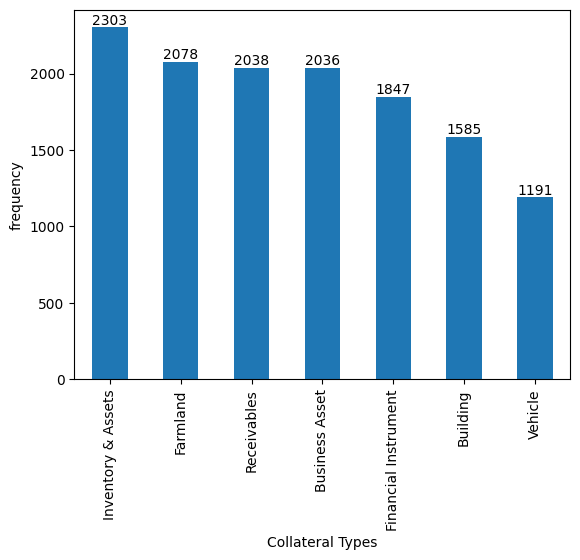

In [12]:
# How are my customers securing their loans?
ax=df['Collateral Types'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xlabel('Collateral Types')
plt.ylabel('frequency')
plt.show()

In [13]:
df['Credit Default'].value_counts()

,count
Credit Default,
0,10072
1,4928


In [14]:
# What's the percentage of default?
count_no_default = len(df[df['Credit Default']==0])
count_default = len(df[df['Credit Default']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print('\033[1m percentage of no default is', pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print('\033[1m percentage of default', pct_of_default*100)

 percentage of no default is 67.14666666666666
 percentage of default 32.85333333333333


From the above we discover that Our classes are imbalanced, and the ratio of no-default to default instances is 67:32.

In [15]:
# Group by 'Credit Default' and calculate the mean of only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df.groupby('Credit Default')[numeric_cols].mean()

,Loan Amount (USD),Customer Monthly Turn Over (USD),Outstanding Balance,Collateral Value (USD),Drought Probability,Flood Probability,Landslide Probability,Days Past Due Date,Credit Default
Credit Default,,,,,,,,,
0,250070.675313,391448.708622,124440.282967,517596.211381,0.590684,0.340948,0.194512,4.348888,0.0
1,253491.153040,392852.136193,126480.624241,521809.135649,0.597939,0.378330,0.205638,4.580154,1.0


 https://medium.com/@polanitzer/logistic-regression-in-python-predict-the-probability-of-default-of-an-individual-8a0091da3775

Observations:

The average age of loan applicants who defaulted on their loans is higher than that of the loan applicants who didn’t.
Surprisingly, years_with_current_employer (years with current employer) are higher for the loan applicants who defaulted on their loans.
Understandably, years_at_current_address (years at current address) are lower the loan applicants who defaulted on their loans. The lower the years at current address, the higher the chance to default on a loan.
Surprisingly, household_income (household income) is higher for the loan applicants who defaulted on their loans.
Understandably, debt_to_income_ratio (debt to income ratio) is higher for the loan applicants who defaulted on their loans.
Understandably, credit_card_debt (credit card debt) is higher for the loan applicants who defaulted on their loans.
Understandably, other_debt (other debt) is higher for the loan applicants who defaulted on their loans.

###According to the CBK, loans are classified into five categories, each requiring different provisioning levels:

*   Normal loans (performing well) require only 1% provisioning.
*   Watch loans (30–90 days overdue) require 3% provisioning.
*   Substandard loans (90–180 days overdue) require 20% provisioning.
*   Doubtful loans (180–360 days overdue) require 50% provisioning.
*   Loss loans (over 360 days overdue) require 100% provisioning.

In [16]:
# Range of Days Past Due Date

print("Range of Days Past Due Date:", df['Days Past Due Date'].min(), "-", df['Days Past Due Date'].max())

Range of Days Past Due Date: 0 - 32


In [17]:
# Loanbook classification using Days Past Due Date

def classify_loan(dppd):
  if 0 <= dppd <= 10:
    return 'Normal'
  elif 11 <= dppd <= 15:
    return 'Watch'
  elif 16 <= dppd <= 20:
    return 'Substandard'
  elif 21 <= dppd <= 25:
    return 'Doubtful'
  else:
    return 'Loss'

df['Classification'] = df['Days Past Due Date'].apply(classify_loan)
df.head()

,LoanID,Customer Type,Loan Type,Loan Amount (USD),Customer Monthly Turn Over (USD),Loan Term (Months),Outstanding Balance,Collateral Types,Collateral Value (USD),County,Drought Probability,Flood Probability,Landslide Probability,Days Past Due Date,Credit Default,Classification
0,SYN00000,SME,Agricultural Loan,364511.10,905444.68,36,51240.06,Vehicle,525416.18,Turkana,0.982142,0.093029,0.010000,0,0,Normal
1,SYN00001,Corporate,Agricultural Loan,201769.46,101991.26,72,76020.05,Vehicle,346304.95,Garissa,0.875982,0.523716,0.066324,0,1,Normal
2,SYN00002,Corporate,Manufacturing,4652.85,5965.12,Revolving,414.16,Building,11996.05,Garissa,0.924866,0.516732,0.069289,0,0,Normal
3,SYN00003,Individual,Agricultural Loan,40213.46,97206.48,72,34001.31,Building,108161.83,Kwale,0.210189,0.550838,0.259047,0,0,Normal
4,SYN00004,SME,Business Loan,11040.57,31875.85,240,5453.20,Building,21925.70,Turkana,0.984698,0.010000,0.010000,14,0,Watch


In [18]:

# Filter for NonPerformingLoans
npl_classification = ['Substandard', 'Doubtful', 'Loss']
npl_df = df[df['Classification'].isin(npl_classification)]

# Calculate and format outstanding balance
npl_outstanding_balance = npl_df.groupby('Classification')['Outstanding Balance'].sum().reset_index()
npl_outstanding_balance = npl_outstanding_balance.rename(columns={'Outstanding Balance': 'Total Outstanding Balance'})

# Convert to integer if necessary (safe only if all values are whole numbers)
npl_outstanding_balance['Total Outstanding Balance'] = npl_outstanding_balance['Total Outstanding Balance'].astype(int)

print("Outstanding Balance for NonPerformingLoans:")
print(npl_outstanding_balance)

Outstanding Balance for NonPerformingLoans:
  Classification  Total Outstanding Balance
0       Doubtful                   41648575
1           Loss                    3003854
2    Substandard                  197107320


In [19]:
# Calculate total outstanding balance for NonPerformingLoans (Substandard, Doubtful, Loss)
npl_classification = ['Substandard', 'Doubtful', 'Loss']
npl_df = df[df['Classification'].isin(npl_classification)]

# Group by classification and sum outstanding balances
npl_outstanding_balance = (
    npl_df.groupby('Classification')['Outstanding Balance']
    .sum()
    .astype(int)  # Convert to integer
    .reset_index()
    .rename(columns={'Outstanding Balance': 'Total Outstanding Balance'})
)

# Final output is a DataFrame
npl_outstanding_balance


,Classification,Total Outstanding Balance
0,Doubtful,41648575
1,Loss,3003854
2,Substandard,197107320


In [20]:
# Calculate total outstanding balance for NonPerformingLoans (Substandard, Doubtful, Loss)
npl_classification = ['Substandard', 'Doubtful', 'Loss']
npl_df = df[df['Classification'].isin(npl_classification)]

npl_outstanding_balance = npl_df.groupby('Classification')['Outstanding Balance'].sum().reset_index()
npl_outstanding_balance = npl_outstanding_balance.rename(columns={'Outstanding Balance': 'Total Outstanding Balance'})

print("Outstanding Balance for NonPerformingLoans:")
npl_outstanding_balance

Outstanding Balance for NonPerformingLoans:


,Classification,Total Outstanding Balance
0,Doubtful,4.164858e+07
1,Loss,3.003854e+06
2,Substandard,1.971073e+08


In [21]:
# What's the total sum of Total Outstanding Balance for npl_classification
total_npl_outstanding_balance = npl_outstanding_balance['Total Outstanding Balance'].sum()
print(f"\nTotal Outstanding Balance for NonPerformingLoans: {total_npl_outstanding_balance:,.2f}")


Total Outstanding Balance for NonPerformingLoans: 241,759,749.84


### Calculating the NPL Ratio for the bank

 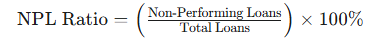

In [22]:
# Calculate Total Outstanding Balance for all loans
total_outstanding_balance = df['Outstanding Balance'].sum()
# print(f"Total Outstanding Balance: {total_outstanding_balance:,.2f}")

# Calculate NPL Ratio
npl_ratio = (total_npl_outstanding_balance / total_outstanding_balance) * 100
print(f"NPL Ratio: {npl_ratio:.2f}%")

NPL Ratio: 12.88%


### Calculating the Provision:

The bank multiplies the outstanding balance of each loan by the corresponding provisioning percentage to determine the provision amount for that loan.

The total loan loss provision is the sum of all individual loan provisions.

In [23]:
# Calculating the provision amount for individual loans as per the CBK guidelines

df['LoanProvision'] = df.apply(lambda row: row['Outstanding Balance'] * 0.01 if row['Classification'] == 'Normal' else
                                 row['Outstanding Balance'] * 0.03 if row['Classification'] == 'Watch' else
                                 row['Outstanding Balance'] * 0.20 if row['Classification'] == 'Substandard' else
                                 row['Outstanding Balance'] * 0.50 if row['Classification'] == 'Doubtful' else
                                 row['Outstanding Balance'] * 1.00, axis=1)
df.head()

,LoanID,Customer Type,Loan Type,Loan Amount (USD),Customer Monthly Turn Over (USD),Loan Term (Months),Outstanding Balance,Collateral Types,Collateral Value (USD),County,Drought Probability,Flood Probability,Landslide Probability,Days Past Due Date,Credit Default,Classification,LoanProvision
0,SYN00000,SME,Agricultural Loan,364511.10,905444.68,36,51240.06,Vehicle,525416.18,Turkana,0.982142,0.093029,0.010000,0,0,Normal,512.4006
1,SYN00001,Corporate,Agricultural Loan,201769.46,101991.26,72,76020.05,Vehicle,346304.95,Garissa,0.875982,0.523716,0.066324,0,1,Normal,760.2005
2,SYN00002,Corporate,Manufacturing,4652.85,5965.12,Revolving,414.16,Building,11996.05,Garissa,0.924866,0.516732,0.069289,0,0,Normal,4.1416
3,SYN00003,Individual,Agricultural Loan,40213.46,97206.48,72,34001.31,Building,108161.83,Kwale,0.210189,0.550838,0.259047,0,0,Normal,340.0131
4,SYN00004,SME,Business Loan,11040.57,31875.85,240,5453.20,Building,21925.70,Turkana,0.984698,0.010000,0.010000,14,0,Watch,163.5960


### Provision Coverage Ratio (PCR):

The PCR is a key metric that indicates the adequacy of a bank's loan loss provisions.

It is calculated as (Total Loan Loss Provisions / Gross Non-Performing Assets).

A higher PCR generally indicates a healthier bank, as it suggests the bank has set aside sufficient funds to cover potential losses.

In [24]:
# Calculate Total Loan Provision
Total_LoanProvision = df['LoanProvision'].sum()
print(f"Total Loan Provision: {Total_LoanProvision:,.2f}")

# Calculating Provision Coverage Ratio (PCR)
Provision_Coverage_Ratio = (Total_LoanProvision / total_npl_outstanding_balance) * 100
print(f"Provision Coverage Ratio: {Provision_Coverage_Ratio:.2f}%")

Total Loan Provision: 84,525,290.25
Provision Coverage Ratio: 34.96%


In [25]:
# Calculate CCF
# CCF =Oustanding bal

# # Sample Credit Conversion Factor (if not in your data)
# default_ccf = 0.2  # 20%

# # Filter mortgage loans
# mortgage_df = df[df['Loan Type'] == 'Mortgage'].copy()

# # If CCF column doesn't exist, assign default
# if 'CCF' not in mortgage_df.columns:
#     mortgage_df['CCF'] = default_ccf

# # Calculate EAD
# mortgage_df['EAD'] = mortgage_df['Outstanding Balance'] + (mortgage_df['Undrawn Commitment'] * mortgage_df['CCF'])

# # View EAD for mortgage loans
# print(mortgage_df[['Loan ID', 'Outstanding Balance', 'Undrawn Commitment', 'CCF', 'EAD']].head())

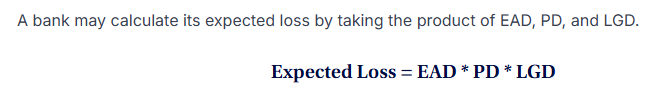

### 1 Calculate the Probability of Default (PD)
It's usually expressed as a percentage, with higher percentages indicating a greater risk of default.

PD is not static; it can change over time based on various factors.

Why it's important:
*   Lenders: Use PD to determine interest rates, loan terms, and whether to approve a loan.
*   Investors: Use PD to evaluate the risk associated with bonds or other debt instruments.
*   Financial institutions: Use PD in credit risk models to manage overall portfolio risk.


How climatic variables affect loan provisions:

1. Increased Probability of Default (PD) due to Physical Risks:

Direct Impact on Borrowers: Extreme weather events (like floods, droughts, wildfires, severe storms) or gradual climate shifts (like rising sea levels, prolonged heatwaves) can directly affect a borrower's ability to generate income and repay loans.

Agriculture: Droughts and floods can destroy crops, leading to significant income loss for farmers. This directly impacts their capacity to repay agricultural loans.

Businesses: Businesses in affected regions might experience disruptions to operations, supply chain issues, or damage to physical assets, leading to reduced revenue and increased default risk.

Households: Homeowners in areas prone to natural disasters might face property damage, loss of employment, or increased living expenses, making it harder to meet mortgage payments or consumer loan obligations.
Reduced Collateral Value (LGD - Loss Given Default):
Properties (e.g., real estate, agricultural land) in climate-vulnerable areas can lose significant value due to physical damage or the perceived increased risk. This means that if a borrower defaults, the bank might recover less from the sale of the collateral, increasing the potential loss.
For example, a house in a frequently flooded area might become difficult to sell or insure, severely reducing its market value.